# Sweep $d$ and $k$

In [1]:
import diptest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations, product

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from data_utils import Commonality
from config import PATHS

In [ ]:
ks = [1, 3, 6, 9, 12, 24]
ds = [2, 4, 6, 12, 24, 48]

num_rounds = 200
num_episodes = 50

df = main(
    ks=ks,
    ds=ds,
    num_rounds=num_rounds,
    num_experiments=num_episodes,
    seed=42
)

Running memory sweeps:   0%|          | 0/6 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/6 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/6 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/6 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

In [100]:
dfE = df[df['Round'] >= int(0.9 * num_rounds)]
dfE.head(2)

,index,Memory,Num_predictors,Identifier,Round,Agent,Decision,Score,Policy,Prediction,Inaccuracy
180,180,2,1,0,180,0,1,1,1-window-mirror,54,24.261111
181,181,2,1,0,181,0,1,-1,1-window-mirror,22,24.259669


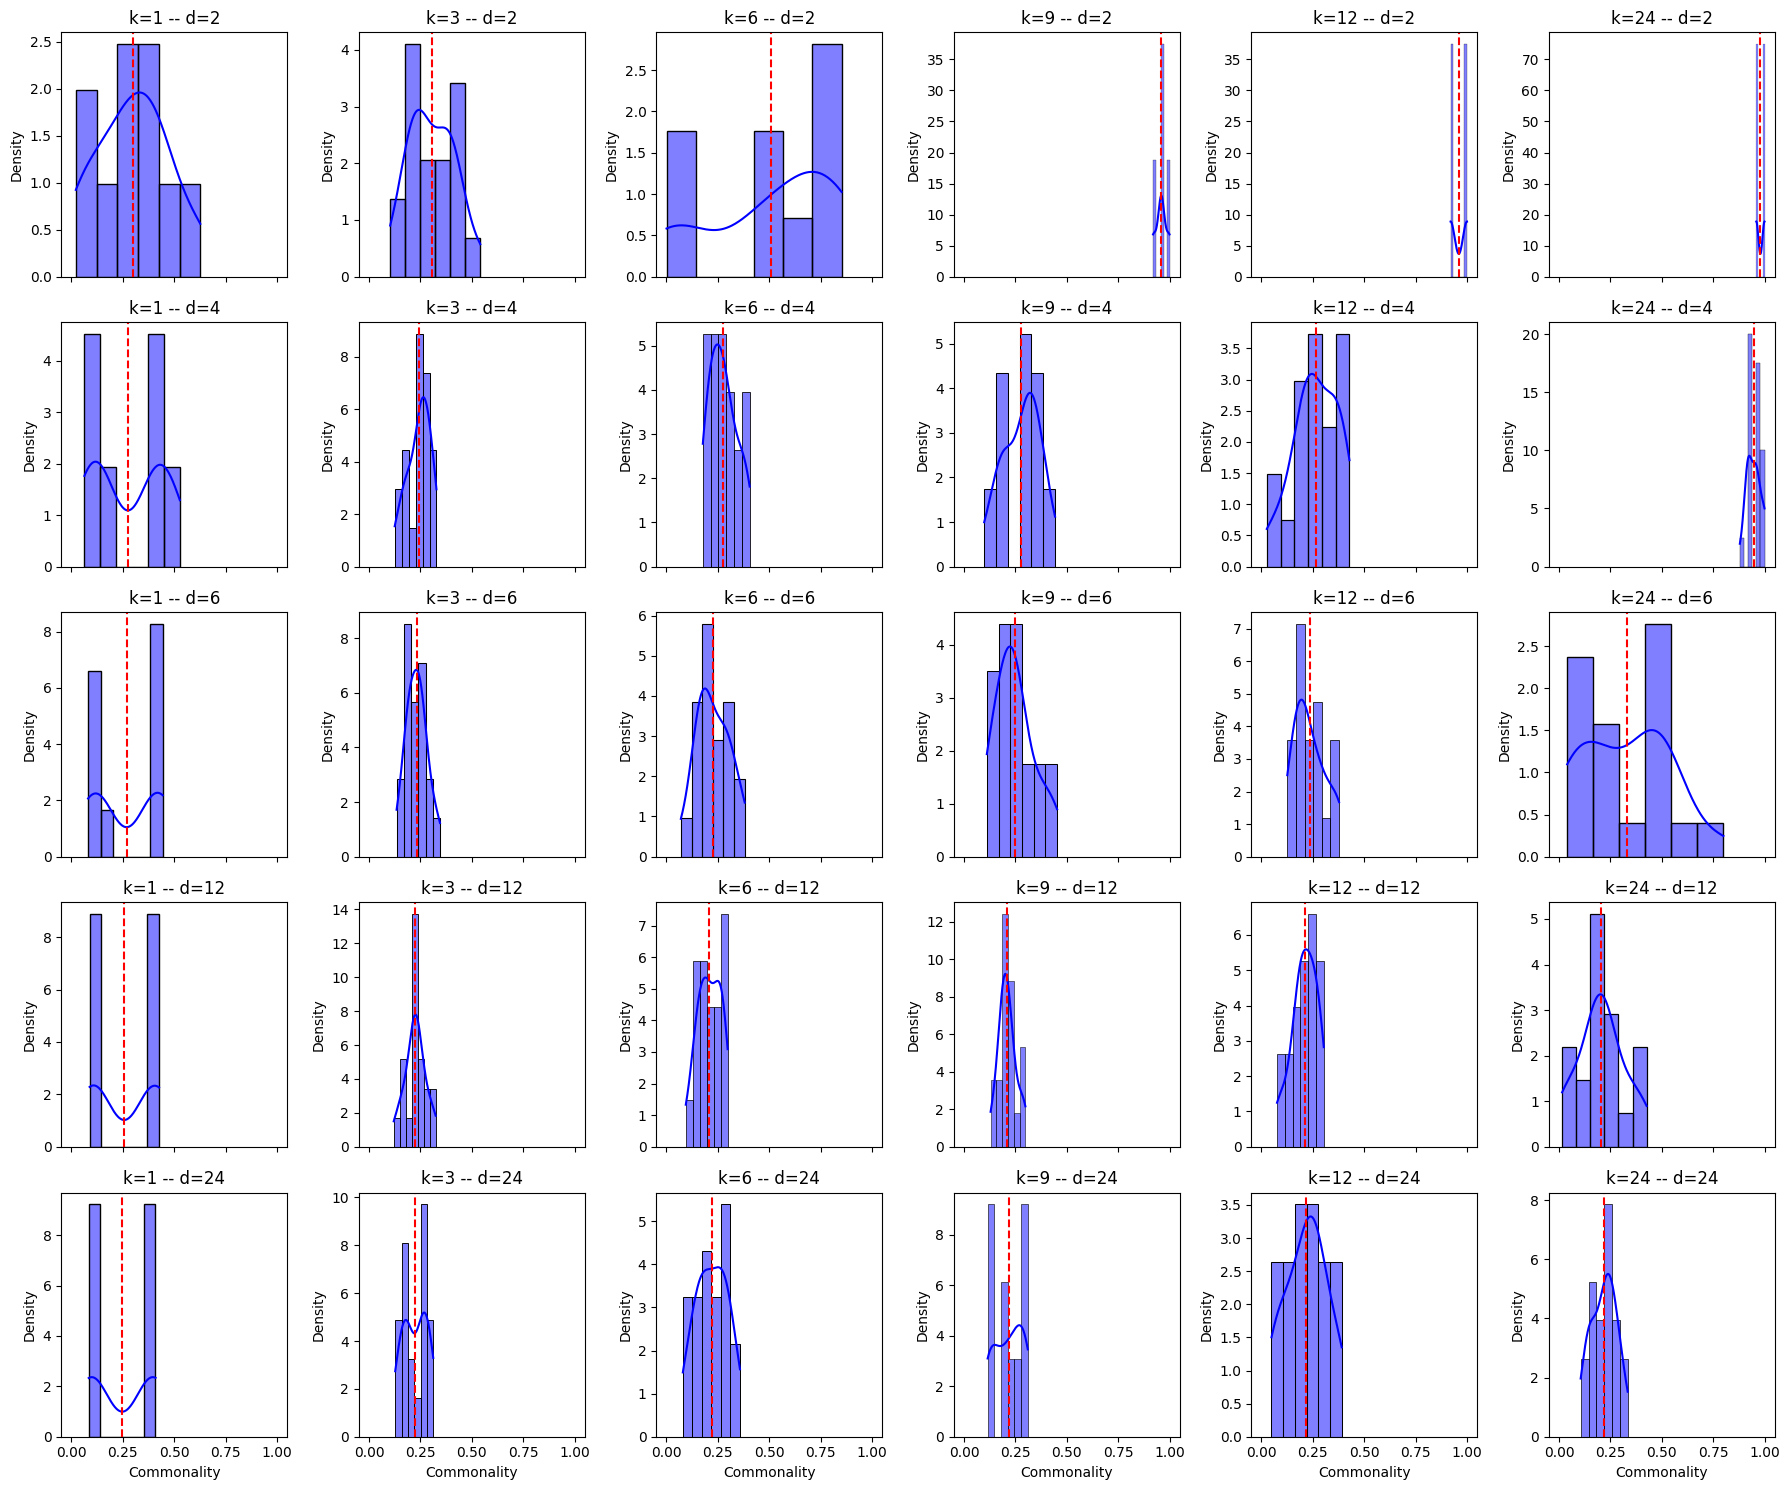

In [ ]:
# This cell shows the sweep with the Sarle coefficient

fig, axes = plt.subplots(
    len(ds), len(ks), 
    figsize=(3*len(ks),3*len(ds)), 
    tight_layout=True,
    sharex=True, sharey=False
)

for k, d in product(ks, ds):
    df_to_plot = dfE[(dfE['Memory'] == d) & (dfE['Num_predictors'] == k)]
    df_to_plot['Prediction_lag'] = df_to_plot.groupby(['Identifier','Agent'])['Prediction'].transform('shift',1)
    df_to_plot['Attendance'] = df_to_plot.groupby(['Identifier','Round'])['Decision'].transform('sum')

    # # Sarle's bimodality coefficient:
    # df2A = df_to_plot.groupby('Round').agg(
    #     kurtosis=pd.NamedAgg(column="Prediction_lag", aggfunc=lambda x: x.kurt()),
    #     skewness=pd.NamedAgg(column="Prediction_lag", aggfunc=lambda x: x.skew()),
    #     count=pd.NamedAgg(column="Prediction_lag", aggfunc=lambda x: x.count()),
    # )
    # df2A['sarle'] = (df2A['skewness'] ** 2 + 1) / (df2A['kurtosis'] + (3 * (df2A['count'] - 1) ** 2) / ((df2A['count'] - 2) * (df2A['count'] - 3)))

    # #  Hartigan’s dip statistic
    # df2A = df_to_plot.groupby('Round').agg(
    #     hds=pd.NamedAgg(column="Prediction", aggfunc=lambda x: diptest.diptest(x)[0]),
    #     hds_pvalue=pd.NamedAgg(column="Prediction", aggfunc=lambda x: diptest.diptest(x)[1])
    # )

    df2A = df_to_plot.groupby('Round').agg(
        Commonality=pd.NamedAgg(column="Decision", aggfunc=lambda x: Commonality(x.values)),
        Attendance=pd.NamedAgg(column="Decision", aggfunc=lambda x: np.mean(x.values))
    )

    # Plot
    idx_k = ks.index(k)
    idx_d = ds.index(d)
    sns.histplot(df2A['Commonality'], kde=True, ax=axes[idx_d, idx_k], stat='density', color='blue')
    mean_commonality = df2A['Commonality'].mean()
    axes[idx_d, idx_k].axvline(x=mean_commonality, color='red', linestyle='--', label='mean')
    # sns.lineplot(x='Round', y='Attendance', data=df2A, ax=axes[idx_d, idx_k], color='blue', label='Attendance')
    # sns.lineplot(x='Round', y='Commonality', data=df2A, ax=axes[idx_d, idx_k], color='red', label='Commonality')
    # sns.lineplot(x='Round', y='hds', data=df2A, ax=axes[idx_d, idx_k], color='blue', label='Dip Statistic')
    # sns.lineplot(x='Round', y='hds', data=df2A, ax=axes[idx_d, idx_k], color='blue', label='Dip Statistic')
    # sns.lineplot(x='Round', y='hds_pvalue', data=df2A, ax=axes[idx_d, idx_k], color='blue', label='Dip Statistic')
    # sns.lineplot(x='Round', y='sarle', data=df2A, ax=axes[idx_d, idx_k], color='blue', label='Dip Statistic')
    axes[idx_d, idx_k].set_title(f'k={k} -- d={d}')
    # Dashed red line for 5/9 of Sarle's coefficient
    # axes[idx_d, idx_k].axhline(y=5/9, color='red', linestyle='--', label='5/9 Threshold')
    # if idx_d < len(ds) - 1:
    #     axes[idx_d, idx_k].legend_.remove()
    # else:
    #     if idx_k == len(ks) // 2:
    #         axes[idx_d, idx_k].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
    #     else:
    #         axes[idx_d, idx_k].legend_.remove()


In [104]:
df2B = dfE.groupby(['Identifier', 'Round', 'Num_predictors', 'Memory']).agg(
    Commonality=pd.NamedAgg(column="Decision", aggfunc=lambda x: Commonality(x.values)),
    Attendance=pd.NamedAgg(column="Decision", aggfunc=lambda x: np.mean(x.values)),
    Efficiency=pd.NamedAgg(column="Score", aggfunc=lambda x: np.mean(x.values)),
    Inaccuracy=pd.NamedAgg(column="Inaccuracy", aggfunc=lambda x: np.mean(x.values))
)
df2B.head(2)

Commonality  Attendance  Efficiency  \
Identifier Round Num_predictors Memory                                        
0          180   1              2              0.08        0.46        0.46   
           181   1              2              0.56        0.78       -0.78   

                                        Inaccuracy  
Identifier Round Num_predictors Memory              
0          180   1              2        25.012000  
           181   1              2        25.037348

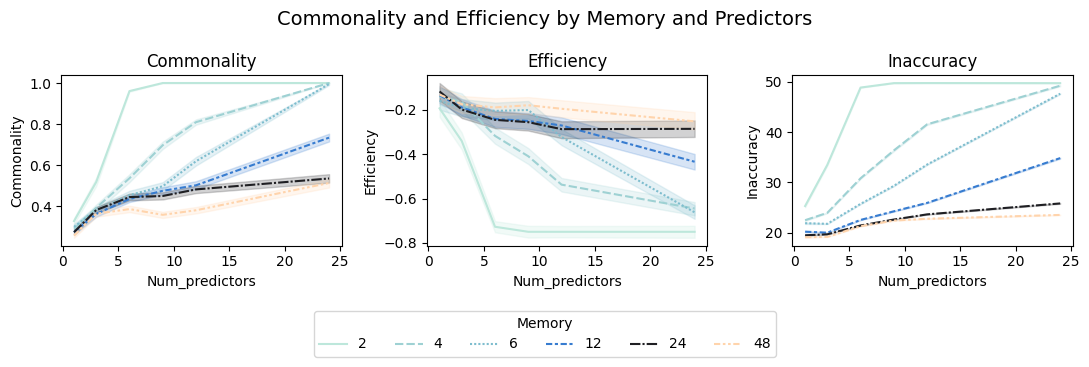

In [106]:
fig, axes = plt.subplots(
    1, 3, 
    figsize=(11,3), 
    tight_layout=True,
    sharex=True, sharey=False
)

sns.lineplot(
    x='Num_predictors',
    y='Commonality',
    data=df2B,
    hue='Memory',
    style='Memory',
    palette='icefire',
    ax=axes[0],
)
axes[0].legend_.remove()
axes[0].set_title('Commonality')

sns.lineplot(
    x='Num_predictors',
    y='Efficiency',
    data=df2B,
    hue='Memory',
    style='Memory',
    palette='icefire',
    ax=axes[1],
)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend_.remove()
axes[1].set_title('Efficiency')

sns.lineplot(
    x='Num_predictors',
    y='Inaccuracy',
    data=df2B,
    hue='Memory',
    style='Memory',
    palette='icefire',
    ax=axes[2],
)
axes[2].legend_.remove()
axes[2].set_title('Inaccuracy')

fig.suptitle('Commonality and Efficiency by Memory and Predictors', fontsize=14)
fig.legend(
    title='Memory',
    handles=handles, 
    labels=labels, 
    loc='lower center', 
    bbox_to_anchor=(.5, -.2),
    ncol=6
)

### Plot sweep Inaccuracy

KeyboardInterrupt: 

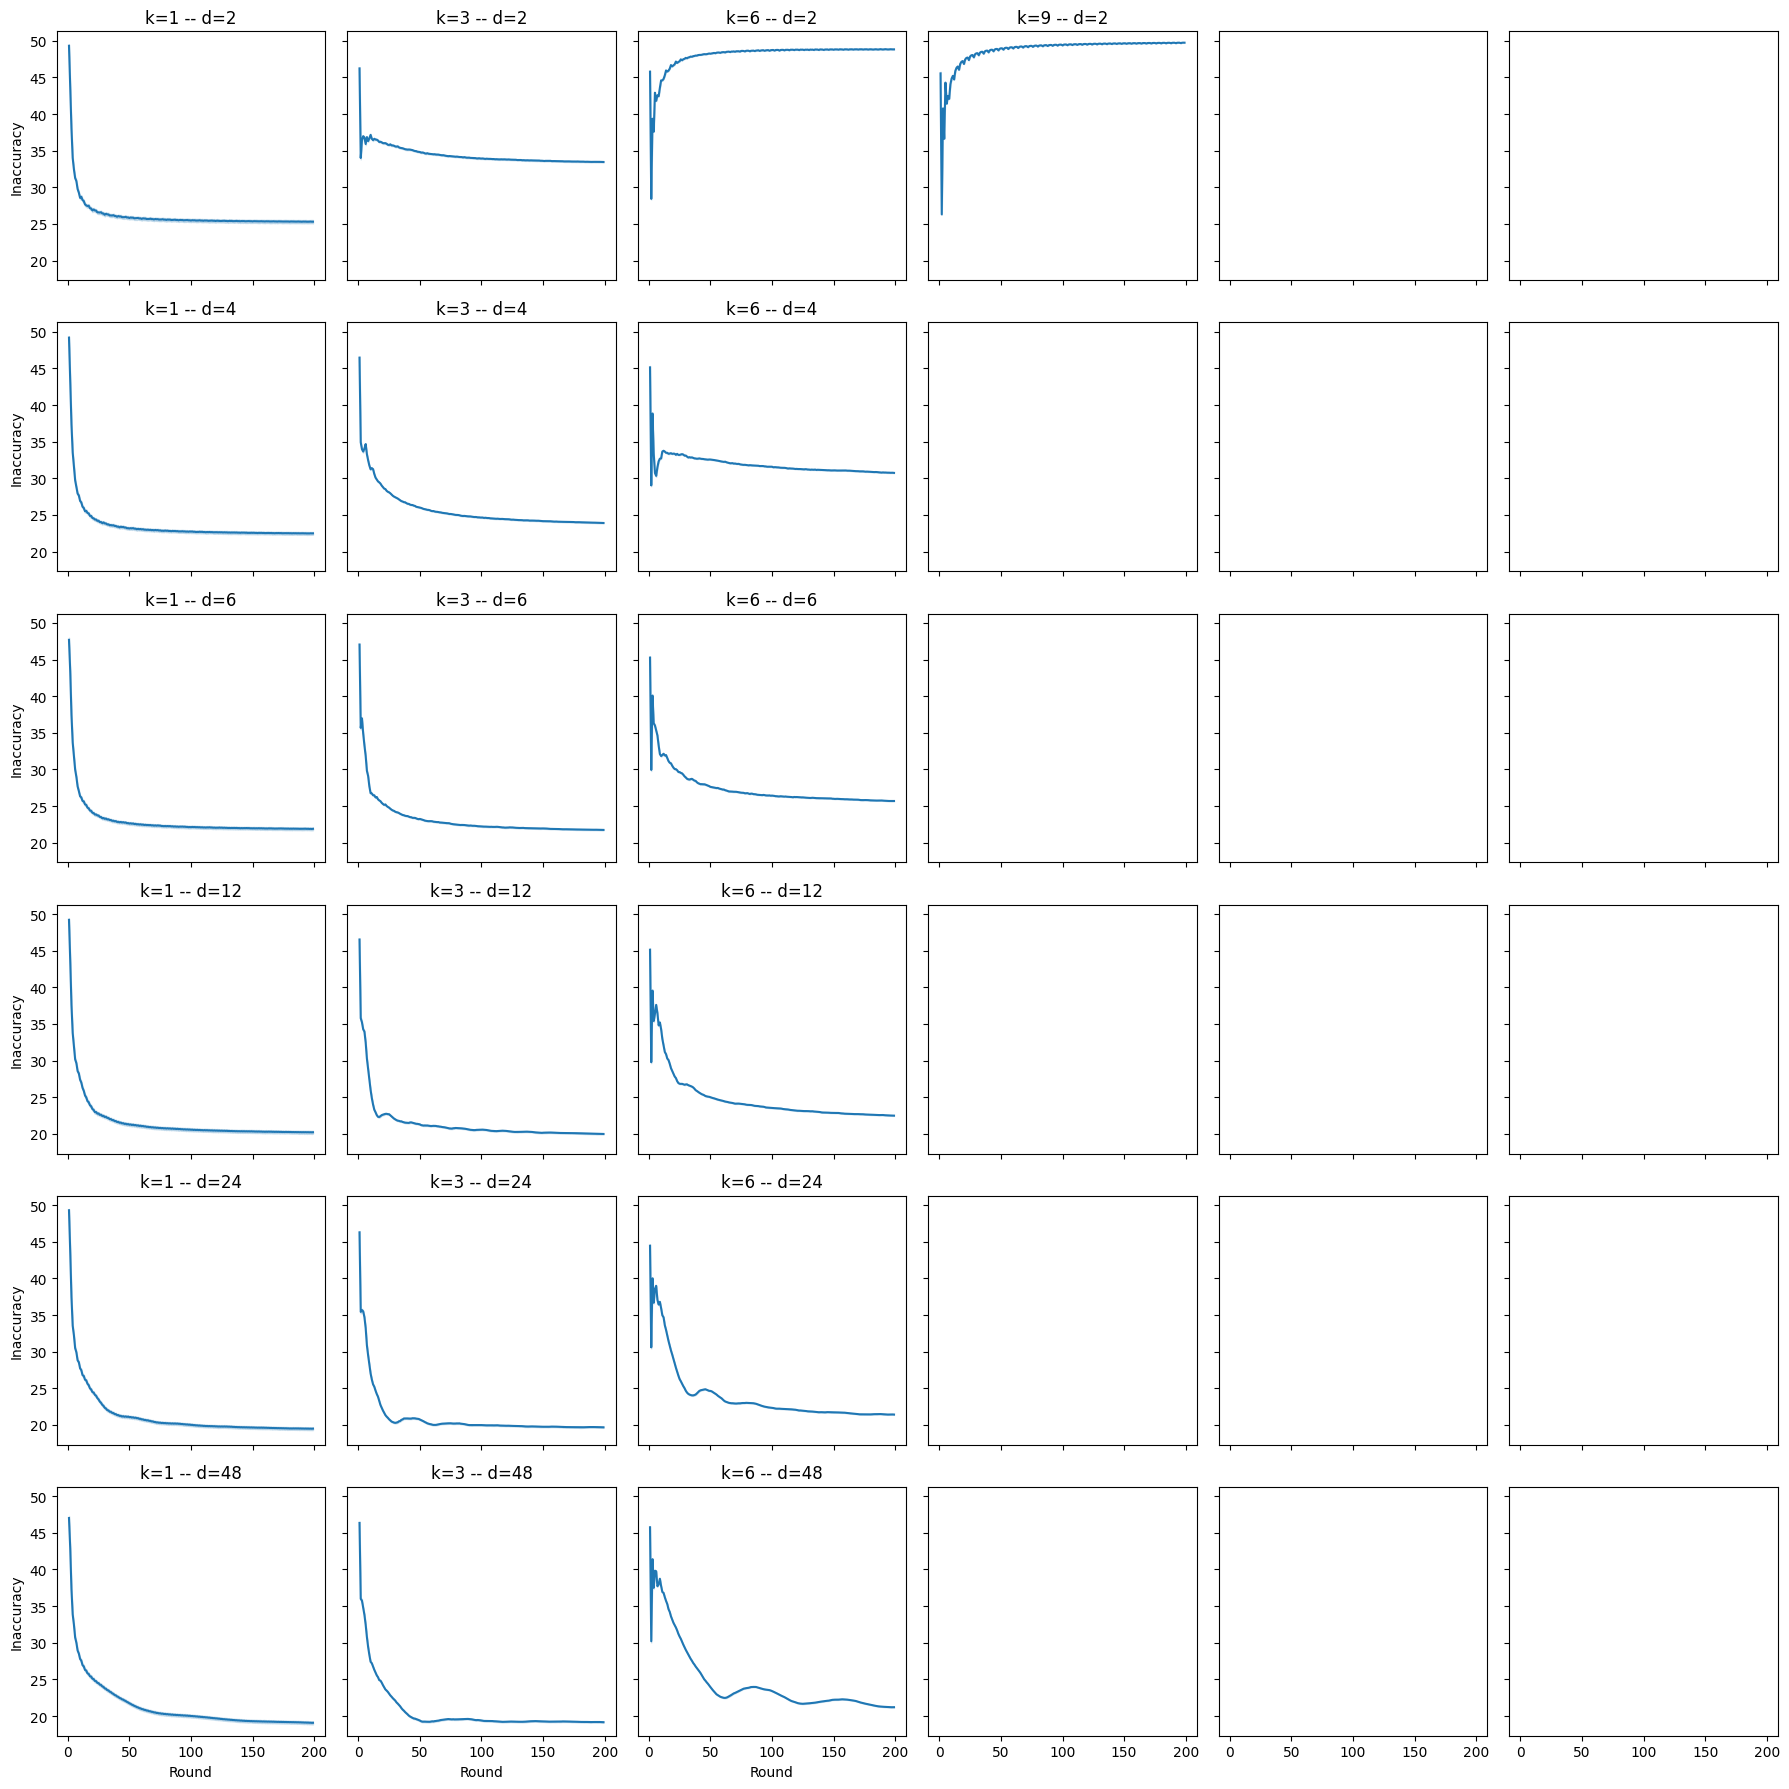

In [103]:
# This cell shows the inaccuracy sweep

fig, axes = plt.subplots(
    len(ds), len(ks), 
    figsize=(3*len(ks),3*len(ds)), 
    tight_layout=True,
    sharex=True, sharey=True
)

for k, d in product(ks, ds):
    df_to_plot = df[(df['Memory'] == d) & (df['Num_predictors'] == k)]
    idx_k = ks.index(k)
    idx_d = ds.index(d)
    sns.lineplot(x='Round', y='Inaccuracy', data=df_to_plot, ax=axes[idx_d, idx_k])
    axes[idx_d, idx_k].set_title(f'k={k} -- d={d}')
    axes[idx_d, idx_k].set_ylabel('Inaccuracy')

In [ ]:
file_name = PATHS['folder_figures_for_paper'] / 'sweep_inaccuracy.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

### Plot sweep $\Delta m$

In [ ]:
# This cell shows the sweep with Delta m

fig, axes = plt.subplots(
    len(ds), len(ks), 
    figsize=(3*len(ks),3*len(ds)), 
    tight_layout=True,
    sharex=True, sharey=True
)

for k, d in product(ks, ds):
    df_to_plot = df[(df['Memory'] == d) & (df['Num_predictors'] == k)]
    df_to_plot['Prediction_lag'] = df_to_plot.groupby(['Identifier','Agent'])['Prediction'].transform('shift',1)
    df_to_plot['Attendance'] = df_to_plot.groupby(['Identifier','Round'])['Decision'].transform('sum')

    # Delta m
    df1A = df_to_plot.groupby('Round')['Prediction_lag'].value_counts().reset_index(name='Count')
    # df2AA = df1A.groupby('Round').apply(lambda x: delta_m(list(x['Prediction_lag']), list(x['Count']))).reset_index()
    df2AA = df1A.groupby('Round').apply(lambda x: IQR(x['Prediction_lag'].values)).reset_index()
    df2AA.columns = ['Round','Dif_modes']

    # Plot
    idx_k = ks.index(k)
    idx_d = ds.index(d)
    sns.lineplot(x='Round', y='Dif_modes', data=df2AA, ax=axes[idx_d, idx_k])
    axes[idx_d, idx_k].set_title(f'k={k} -- d={d}')
    # axes[idx_d, idx_k].set_ylabel('$\Delta$m')
    axes[idx_d, idx_k].set_ylabel('Inter quartile Range')

In [ ]:
file_name = PATHS['folder_figures_for_paper'] / 'sweep_delta_m.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

### Test de bimodalidad

In [ ]:
N = 1000
hN = N // 2
x = np.empty(N, dtype=np.float64)
dist = 1.25
x[:hN] = np.random.normal(dist, 1.0, hN)
x[hN:] = np.random.normal(-dist, 1.0, hN)

# both the dip statistic and p-value
dip, pval = diptest.diptest(x)

ax = sns.histplot(x, kde=True)
ax.set_title(f'Dip Test Example --- distance = {2*dist} (p={pval:.3f})')

In [ ]:
N = 1000
hN = N // 2
x = np.empty(N, dtype=np.float64)
dist = 1.5
x[:hN] = np.random.normal(dist, 1.0, hN)
x[hN:] = np.random.normal(-dist, 1.0, hN)

# both the dip statistic and p-value
dip, pval = diptest.diptest(x)

ax = sns.histplot(x, kde=True)
ax.set_title(f'Dip Test Example --- distance = {2*dist} (p={pval:.3f})')

In [ ]:
# generate some bimodal random draws
N = 1000
hN = N // 2
x = np.empty(N, dtype=np.float64)

df_dist = pd.DataFrame(columns=['Distance', 'Dip Statistic', 'p-value'])
distancias = [2, 1.5, 1.45, 1.4, 1.35, 1.3, 1.25, 1.1, 1, 0.5, 0.25]
# distancias = [1.5]
for dist in distancias:
    for i in range(100):
        x[:hN] = np.random.normal(dist, 1.0, hN)
        x[hN:] = np.random.normal(-dist, 1.0, hN)

        # both the dip statistic and p-value
        dip, pval = diptest.diptest(x)
        # Append the results to the DataFrame
        df_dist = df_dist.append({
            'Distance': 2*dist,
            'Dip Statistic': dip,
            'p-value': pval
        }, ignore_index=True)

ax = sns.lineplot(x='Distance', y='p-value', data=df_dist)
# draw a horizontal line at p=0.05
ax.axhline(y=0.05, color='r', linestyle='--', label='p=0.05')

In [ ]:
df_to_plot.head(2)

In [ ]:
dfB = df_to_plot.groupby('Identifier')['Decision'].mean().reset_index(name='Decision_mean')
dfB['Commonality'] = dfB.apply(lambda x: max(x['Decision_mean'], 1 - x['Decision_mean']), axis=1)
dfB.head(2)

In [ ]:
d = ds[0]
k = ks[0]
df_to_plot = df[(df['Memory'] == d) & (df['Num_predictors'] == k)]
n = df_to_plot['Identifier'].unique().tolist()[0]
dfA = df_to_plot[df_to_plot['Identifier'] == n].copy()
# dfA = dfA[(dfA['Round'] > 20) & (dfA['Round'] < 25)].reset_index(drop=True)

$$
(\frac{\texttt{most\_frequent}}{N} - 0.5) * 2
$$

In [ ]:
dfA

In [ ]:
dfA['Decision'].value_counts().max()

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(3, 12), tight_layout=True, sharex=True, sharey=True)

i = 0
for _, grp in dfA.groupby('Round'):
    sns.histplot(grp['Prediction'], kde=True, ax=ax[i], stat='density')    
    # dip, pval = diptest.diptest(grp['Prediction'])
    # delta = delta_m(grp['Prediction'], grp['Prediction'].value_counts().values)
    ax[i].set_title(f'p-value = {pval:.2f}')
    i += 1

In [ ]:
file_name = PATHS['folder_figures_for_paper'] / 'sweep_d_and_k.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

---